### IMPORTING IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### LOADING DATASETS

In [2]:
iphone_purches=pd.read_excel('iphone purches data.xlsx')

### PRINTING HEAD AND TAIL OF THE IPHONE DATA FRAME

In [3]:
iphone_purches.head(5)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
iphone_purches.tail()

,Gender,Age,Salary,Purchase Iphone
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


### CHECKING THE SHAPE AND INFO OF DATAFRAME

In [5]:
iphone_purches.shape

(400, 4)

In [6]:
iphone_purches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


### CHECKING THE MISSING VALUE IN MY DATAFRAME

In [7]:
iphone_purches.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

We see that there is no missing value in my Dataframe

### CHECKING THE DUPLICATE ROWS IN MY DATAFRAME

In [8]:
iphone_purches[iphone_purches.duplicated()]

,Gender,Age,Salary,Purchase Iphone
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


We observe that there are 20 duplicate rows in my dataframe.

### DELETING ALL THE DUPLICATE ROWS 

In [9]:
iphone_purches=iphone_purches.drop_duplicates()

### CHECKING SHAPE OF NEW DATAFRAME  

In [10]:
iphone_purches.shape

(380, 4)

### CONVERT GENDER IN BINARY VALUE 1 FOR MALE 0 FOR FEMALE

In [11]:
iphone_purches['Gender']=iphone_purches['Gender'].replace({'Male':1,'Female':0})

### PRINTING HEAD OF THE DATA FRAME AGAIN

In [12]:
iphone_purches.head(3)

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0


We can see that my Gender column now has been converted into binary value.

### CHECKING OUTLIERS IN MY DATAFRAME

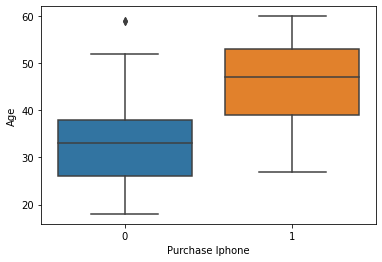

In [13]:
sns.boxplot(data=iphone_purches,y='Age',x='Purchase Iphone')
plt.show()

Outlier present in my Dataframe.

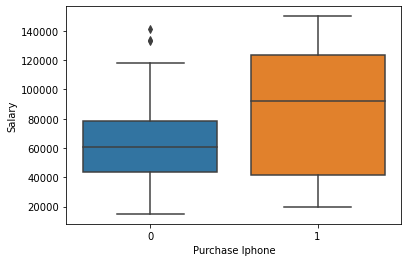

In [14]:
sns.boxplot(data=iphone_purches,y='Salary',x='Purchase Iphone')
plt.show()

Outlier present in my Dataframe.

### REMOVE OUTLIER

In [15]:
iphone_purches[(iphone_purches['Age']>55) & (iphone_purches['Purchase Iphone']==0)]

,Gender,Age,Salary,Purchase Iphone
64,0,59,83000,0
212,0,59,42000,0


In [16]:
iphone_purches[(iphone_purches['Salary']>120000) & (iphone_purches['Purchase Iphone']==0)]

,Gender,Age,Salary,Purchase Iphone
270,0,43,133000,0
284,1,48,141000,0
306,0,51,134000,0


In [17]:
iphone_purches=iphone_purches.drop([64,212,270,284,306],axis=0)

Remove outlier using row indexing.

### DATA VISUALIZATION

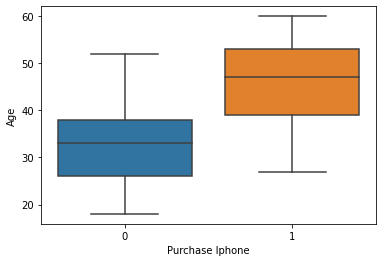

In [18]:
sns.boxplot(data=iphone_purches,y='Age',x='Purchase Iphone')
plt.show()

From above boxplot we can say that peoples whose avarage age are higher, purchase iphone

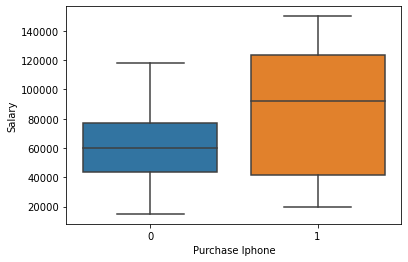

In [19]:
sns.boxplot(data=iphone_purches,y='Salary',x='Purchase Iphone')
plt.show()

From above boxplot we can say that peoples who has higher salary, purchase iphone

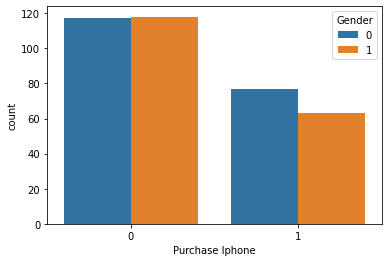

In [20]:
sns.countplot(data=iphone_purches,x='Purchase Iphone',hue='Gender');

From above plot we can conclude that females iphone buyers are more than males.

### BREAKING DOWN MY DATAFRAME IN TARGET AND FEATURES VARIABLES

In [21]:
X=iphone_purches.drop('Purchase Iphone',axis=1)
y=iphone_purches['Purchase Iphone']

### SPLITTING MY DATA INTO TRAINING AND TEST SET

In [22]:
#IMPORTING LIBRARIES 
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### PRINTING TRAINING AND TEST SET

In [24]:
X_train.head(4)

,Gender,Age,Salary
146,0,27,96000
70,1,25,80000
302,0,37,137000
295,0,36,63000


In [25]:
X_test.head(4)

,Gender,Age,Salary
172,0,26,118000
38,0,26,72000
91,0,30,116000
171,1,34,115000


In [26]:
y_train.head(4)

146    1
70     0
302    1
295    0
Name: Purchase Iphone, dtype: int64

In [27]:
y_test.head(4)

172    0
38     0
91     0
171    0
Name: Purchase Iphone, dtype: int64

### SCALING MY DATA

In [28]:
#IMPORTING LIBRARIES
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

creat a scaling variable

In [30]:
scaler.fit(X_train)

StandardScaler()

In [31]:
#TRANSFORMING MY DATA and have stored new values in X_train X_test
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## MODELLING OF DATA

### USING LOGISTIC REGRESSION MODEL

In [32]:
#IMPORTING LIBRARIES
from sklearn.linear_model import LogisticRegression

In [33]:
#CREATING A LOG MODEL
log_model=LogisticRegression()

In [34]:
#FITTING THE MODEL
log_model.fit(X_train,y_train)

LogisticRegression()

In [35]:
#PREDICT
pred_y=log_model.predict(X_test)

### CREATING A DATAFRAME CONTAIN ACTUAL AND PREDICTED RESPONSE.

In [36]:
df=pd.DataFrame({'ACTUAL':y_test,'PREDICTED':pred_y})

In [37]:
#PRINTING DATAFRAME
df.head(6)

,ACTUAL,PREDICTED
172,0,0
38,0,0
91,0,0
171,0,1
242,1,1
112,0,0


### CHECKING THE ACCURACY OF MODEL

In [38]:
#IMPORTING LIBRARIES
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [39]:
confusion_matrix(y_test,pred_y)

array([[43,  6],
       [ 6, 20]], dtype=int64)

In [40]:
print('ACCURACY SCORE:',accuracy_score(y_test,pred_y))
print('PRECISION SCORE:',precision_score(y_test,pred_y))
print('RECALL SCORE:',recall_score(y_test,pred_y))

ACCURACY SCORE: 0.84
PRECISION SCORE: 0.7692307692307693
RECALL SCORE: 0.7692307692307693


I got an accuracy score 84% which is pretty good.

### USING KNN MODEL

In [41]:
#IMPORTING LIBRARIES
from sklearn.neighbors import KNeighborsClassifier

In [42]:
#CREATING A MODEL
knn_model=KNeighborsClassifier()

In [43]:
#FITTING MY MODEL
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
#PREDICT
pred_y=knn_model.predict(X_test)

### CREATING A DATAFRAME CONTAIN ACTUAL AND PREDICTED RESPONSE.

In [45]:
df=pd.DataFrame({'ACTUAL':y_test,'PREDICTED':pred_y})

In [46]:
#PRINTING DATAFRAME
df.head(6)

,ACTUAL,PREDICTED
172,0,1
38,0,0
91,0,1
171,0,1
242,1,1
112,0,0


### CHECKING THE ACCURACY OF MODEL

In [47]:
confusion_matrix(y_test,pred_y)

array([[40,  9],
       [ 1, 25]], dtype=int64)

In [48]:
print('ACCURACY SCORE:',accuracy_score(y_test,pred_y))
print('PRECISION SCORE:',precision_score(y_test,pred_y))
print('RECALL SCORE:',recall_score(y_test,pred_y))

ACCURACY SCORE: 0.8666666666666667
PRECISION SCORE: 0.7352941176470589
RECALL SCORE: 0.9615384615384616


I got an accuracy score 86% which is pretty good.

### USING SVM MODEL

In [49]:
#IMPORTING LIBRARIES
from sklearn.svm import SVC

In [50]:
#CREATING A MODEL
svm_model=SVC()

In [51]:
#FITTING MY MODEL
svm_model.fit(X_train,y_train)

SVC()

In [52]:
#PREDICT
pred_y=svm_model.predict(X_test)

### CREATING A DATAFRAME CONTAIN ACTUAL AND PREDICTED RESPONSE

In [53]:
df=pd.DataFrame({'ACTUAL':y_test,'PREDICTED':pred_y})

In [54]:
#PRINTING DATAFRAME
df.head(6)

,ACTUAL,PREDICTED
172,0,1
38,0,0
91,0,1
171,0,1
242,1,1
112,0,0


### CHECKING THE ACCURACY OF MODEL

In [55]:
confusion_matrix(y_test,pred_y)

array([[40,  9],
       [ 1, 25]], dtype=int64)

In [56]:
print('ACCURACY SCORE:',accuracy_score(y_test,pred_y))
print('PRECISION SCORE:',precision_score(y_test,pred_y))
print('RECALL SCORE:',recall_score(y_test,pred_y))

ACCURACY SCORE: 0.8666666666666667
PRECISION SCORE: 0.7352941176470589
RECALL SCORE: 0.9615384615384616


I got an accuracy score 86% which is pretty good.